In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io, img_as_float

 
%matplotlib inline

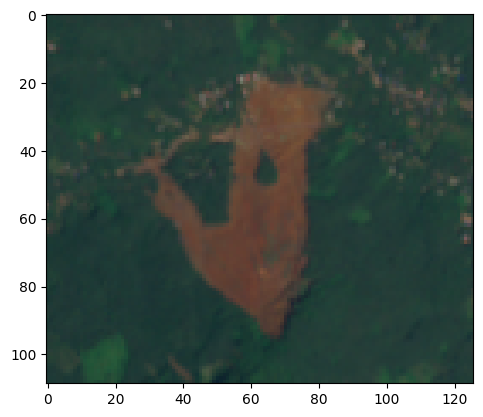

In [14]:
img = io.imread('../data/2019-10-14-00_00_2019-10-14-23_59_Sentinel-2_L1C_True_color.tiff')
plt.imshow(img)

In [18]:
a = img[0][0][0].dtype
b = 0

if a=='float32' or a== 'float64':
    pixel_vals = img.reshape((-1,3))
    b = 1
else:
    pixel_vals = img.reshape((-1,4))

pixel_vals = np.float32(pixel_vals)
a

ValueError: cannot reshape array of size 41202 into shape (4)

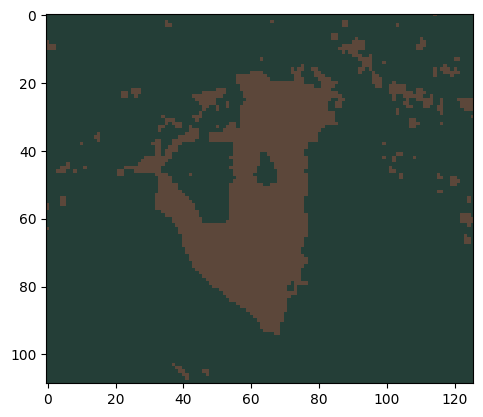

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(pixel_vals)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
if b!= 1:
    centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((img.shape))

plt.imshow(segmented_image)

In [20]:
output_file = "../output/kmeans_k2.tiff"
io.imsave(output_file, segmented_image)

C:\Users\ar560\AppData\Local\Temp\ipykernel_29980\573362199.py:2: UserWarning: ../output/kmeans_k2.tiff is a low contrast image
  io.imsave(output_file, segmented_image)
